In [ ]:
import pandas as pd

df = pd.read_csv('/content/DMV 2/telecom_customer_churn.csv')

print(df.head())
# print(df.info())
# print(df.describe())


  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [ ]:
# handling missing values

df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean())

df['Offer'] = df['Offer'].fillna(0)

df['Multiple Lines'] = df['Multiple Lines'].bfill()

df['Internet Type'] = df['Internet Type'].bfill()

df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].mean())

df['Online Security'] = df['Online Security'].bfill()
df['Online Backup'] = df['Online Backup'].bfill()
df['Device Protection Plan'] = df['Device Protection Plan'].bfill()
df['Premium Tech Support'] = df['Premium Tech Support'].bfill()
df['Streaming TV'] = df['Streaming TV'].bfill()
df['Streaming Movies'] = df['Streaming Movies'].bfill()
df['Streaming Music'] = df['Streaming Music'].bfill()
df['Unlimited Data'] = df['Unlimited Data'].bfill()

df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [ ]:
# remove duplicates

has_duplicates = df.duplicated().any()
print("Any duplicates in the dataset:", has_duplicates)

df.drop_duplicates(inplace=True)


Any duplicates in the dataset: False


In [ ]:
# Convert columns to the correct data types as needed.

df['CustomerID'] = df['CustomerID'].astype(str)  # Example
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# coerce - It prevents the code from throwing an error when pandas encounters data that can’t be converted to the target data type.
# Any values that cannot be converted to a numeric type are replaced with NaN.


dtype('O')

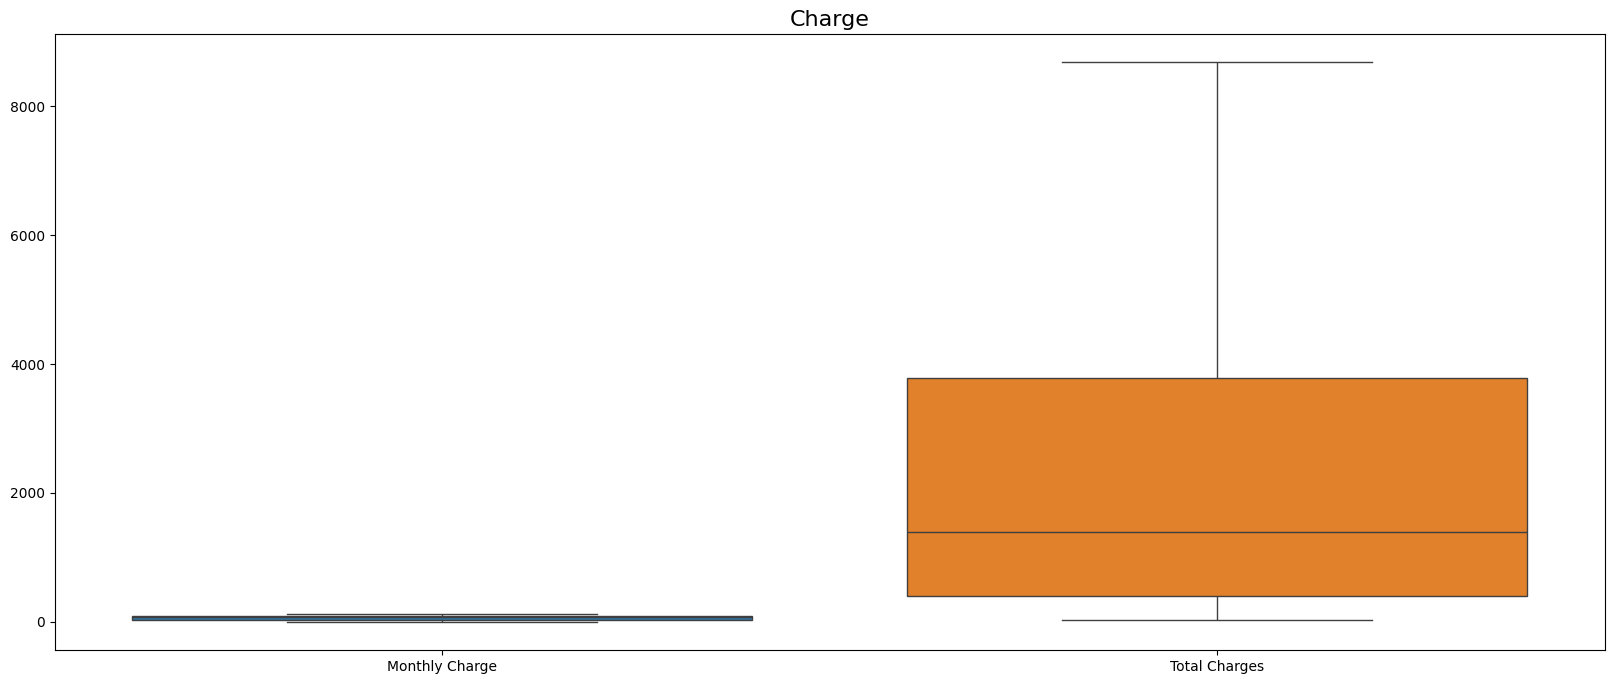

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(20, 8))
# sns.boxplot(x = 'Monthly Charge', y = 'Total Charges', data = df)
sns.boxplot(data=df[['Monthly Charge', 'Total Charges']])
plt.title('Charge', fontsize=16)
plt.show()


# for handling outliers

Q1 = df['Monthly Charge'].quantile(0.25)
Q3 = df['Monthly Charge'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# The factor of 1.5 is a commonly used threshold in the Interquartile Range (IQR) method to identify outliers.

df = df[(df['Monthly Charge'] >= lower_bound) & (df['Monthly Charge'] <= upper_bound)]


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn Category", axis=1)
y = df["Churn Category"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size = 0.2 means 20% will be used as testing and remaining 80% will be used as training

In [ ]:
# Export the cleaned dataset for future analysis or modeling.

df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)